In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('dados_covid_sp_diario_excel.csv',delimiter=';')


In [ ]:
df = pd.read_csv('dados_covid_sp_latin1.csv',encoding='latin1')

ParserError: Error tokenizing data. C error: Expected 5 fields in line 6, saw 8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880498 entries, 0 to 880497
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   nome_munic     880498 non-null  object
 1   codigo_ibge    880498 non-null  int64 
 2   datahora       880498 non-null  object
 3   casos          880498 non-null  int64 
 4   casos_novos    880498 non-null  int64 
 5   casos_mm7d     880498 non-null  object
 6   obitos         880498 non-null  int64 
 7   obitos_novos   880498 non-null  int64 
 8   obitos_mm7d    880498 non-null  object
 9   pop            880498 non-null  int64 
 10  semana_epidem  880498 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 73.9+ MB


In [ ]:
df['datahora'] = pd.to_datetime(df['datahora'])

In [ ]:
df_municipio = df[['casos','nome_munic','casos_novos','obitos','obitos_novos','pop','datahora']]

In [ ]:
df_municipio= df_municipio[df['nome_munic']!='Ignorado']

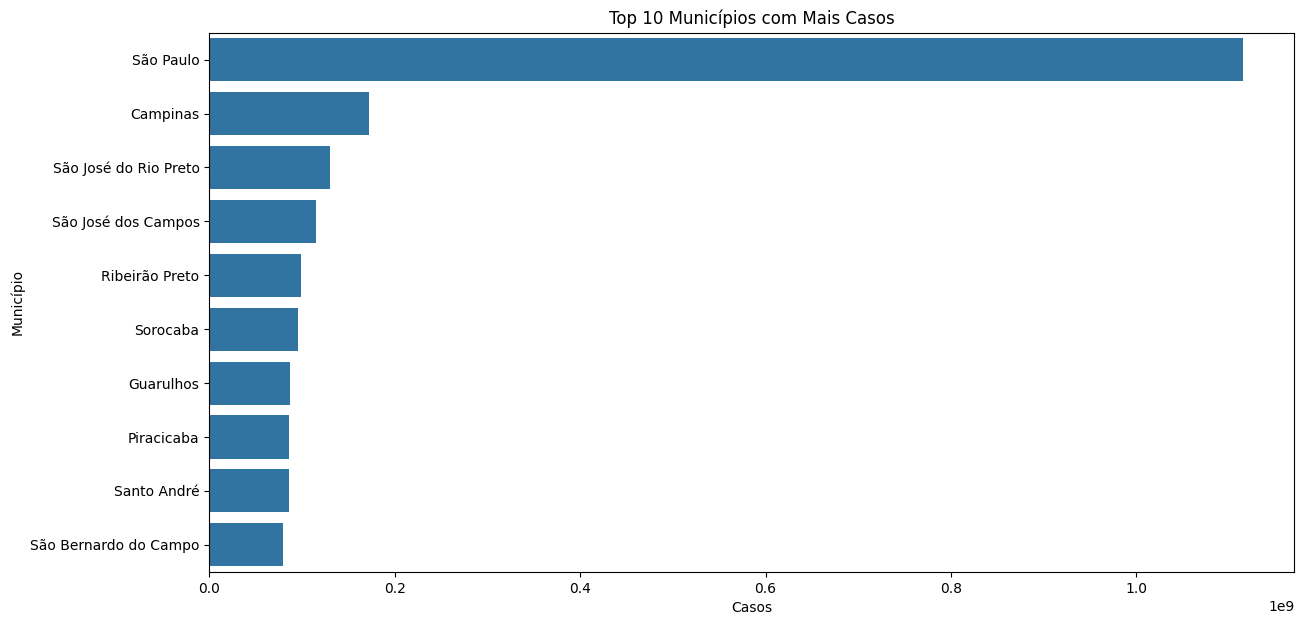

In [ ]:
df_municipio
municipios_data = df_municipio.groupby('nome_munic').sum('casos').reset_index()

# Top 10 municípios com mais casos
top_10_munic = municipios_data.nlargest(10, 'casos')

# Plotar distribuição de casos nos top 10 municípios
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_munic, x='casos', y='nome_munic')
plt.xlabel('Casos')
plt.ylabel('Município')
plt.title('Top 10 Municípios com Mais Casos')
plt.show()

In [ ]:
df_sp= df_municipio[df['nome_munic']=='São Paulo']
df_campinas = df_municipio[df['nome_munic']=='Campinas']
df_sjrp= df_municipio[df['nome_munic']=='São José do Rio Preto']

<ipython-input-58-0461a16e666a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sp= df_municipio[df['nome_munic']=='São Paulo']
<ipython-input-58-0461a16e666a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_campinas = df_municipio[df['nome_munic']=='Campinas']
<ipython-input-58-0461a16e666a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sjrp= df_municipio[df['nome_munic']=='São José do Rio Preto']


In [ ]:
lista_top_3_municipios = [df_sp,df_campinas,df_sjrp]

In [ ]:
df_sp.iloc[0].nome_munic

'São Paulo'

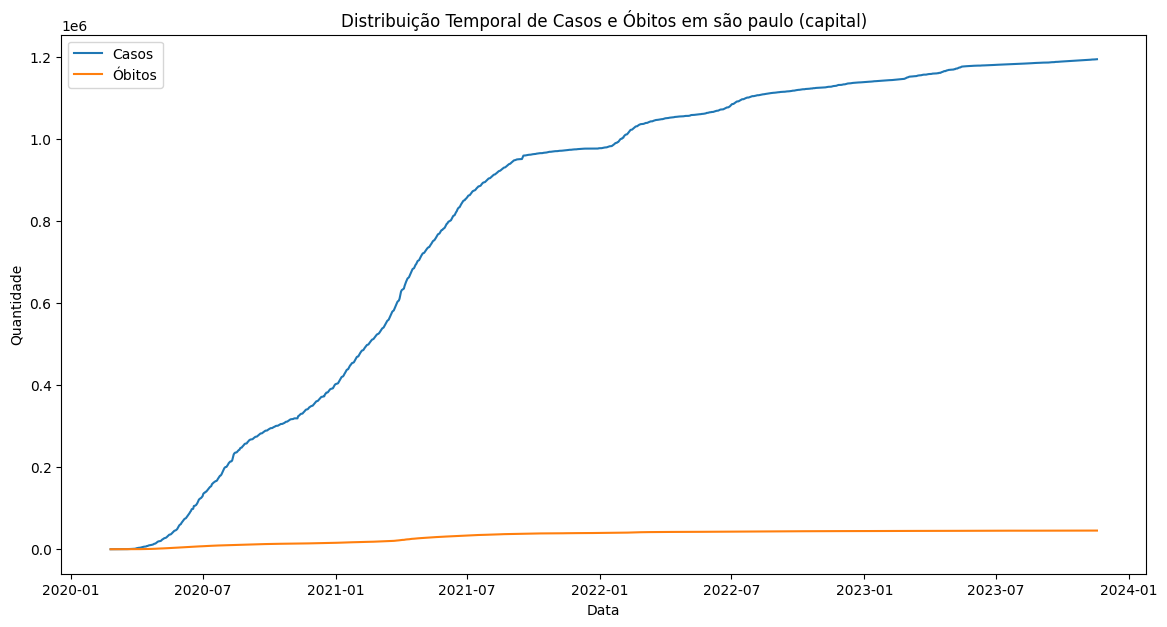

In [ ]:
# Agregação diária
daily_data = df_sp.groupby('datahora').sum(['casos','obitos']).reset_index()

# Plotar casos ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(daily_data['datahora'], daily_data['casos'], label='Casos')
plt.plot(daily_data['datahora'], daily_data['obitos'], label='Óbitos')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.title('Distribuição Temporal de Casos e Óbitos em são paulo (capital)')
plt.legend()
plt.show()


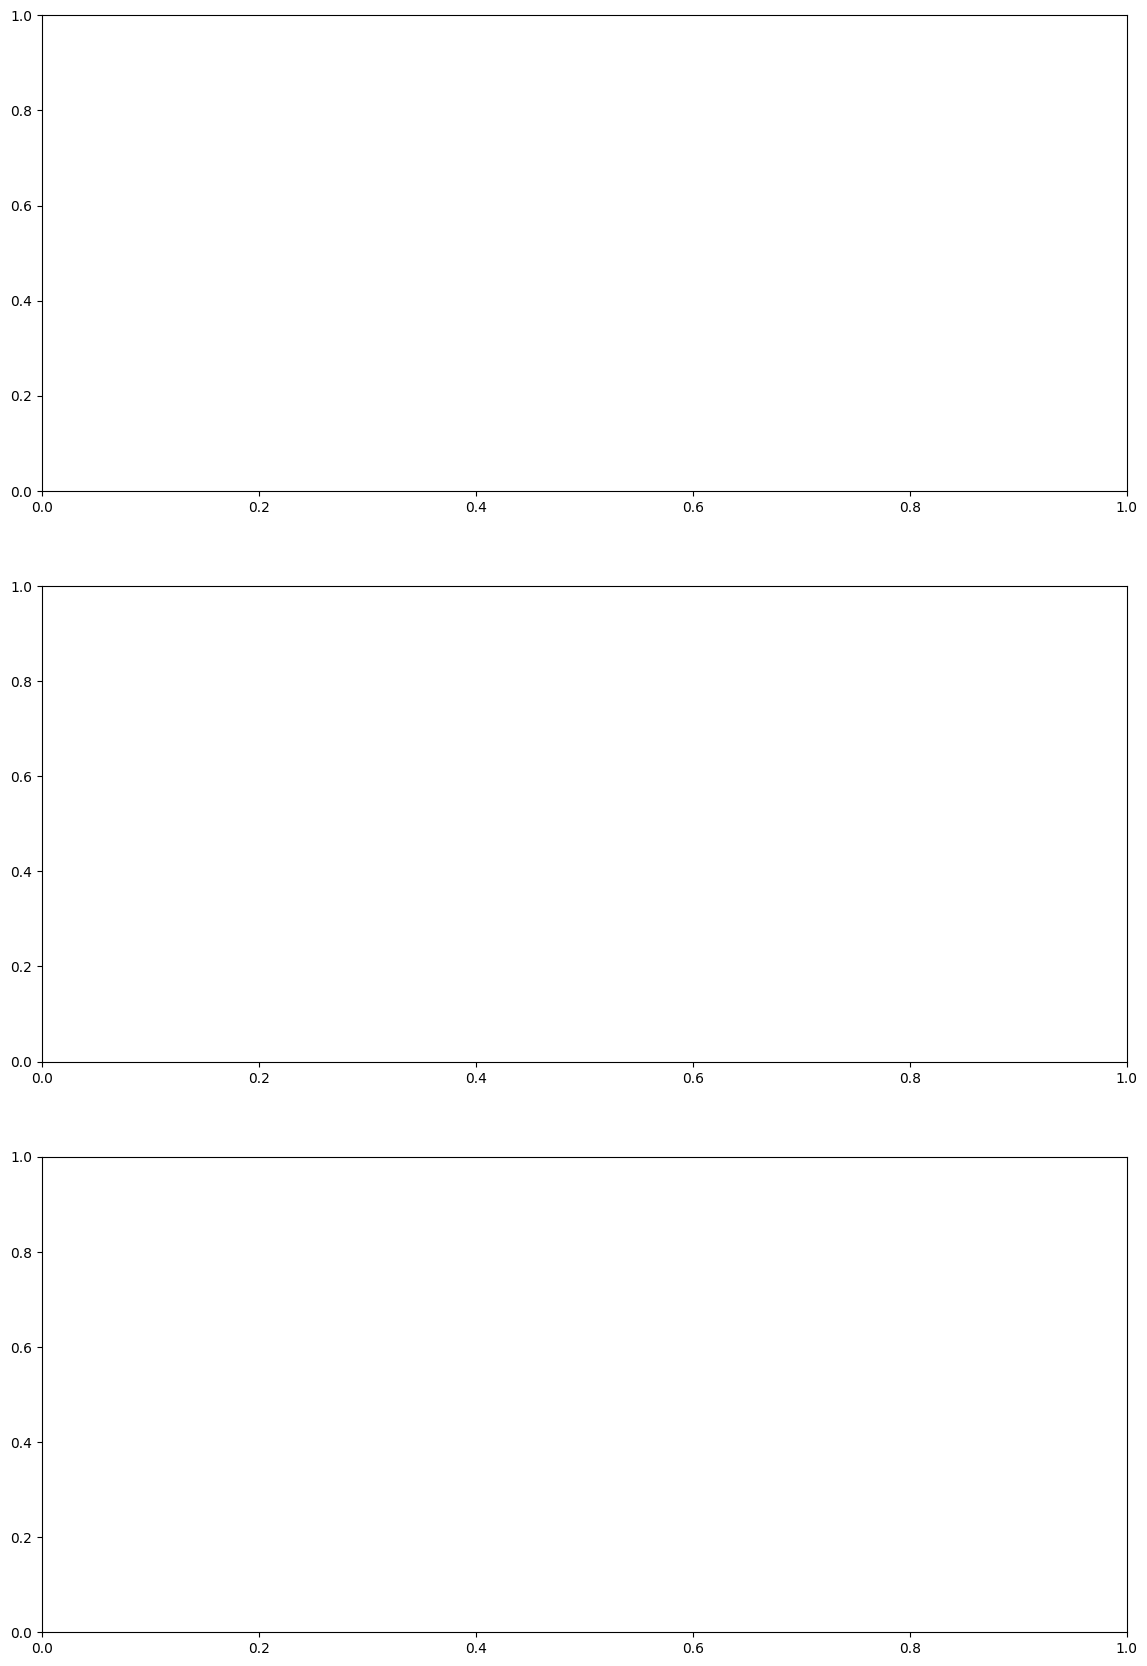

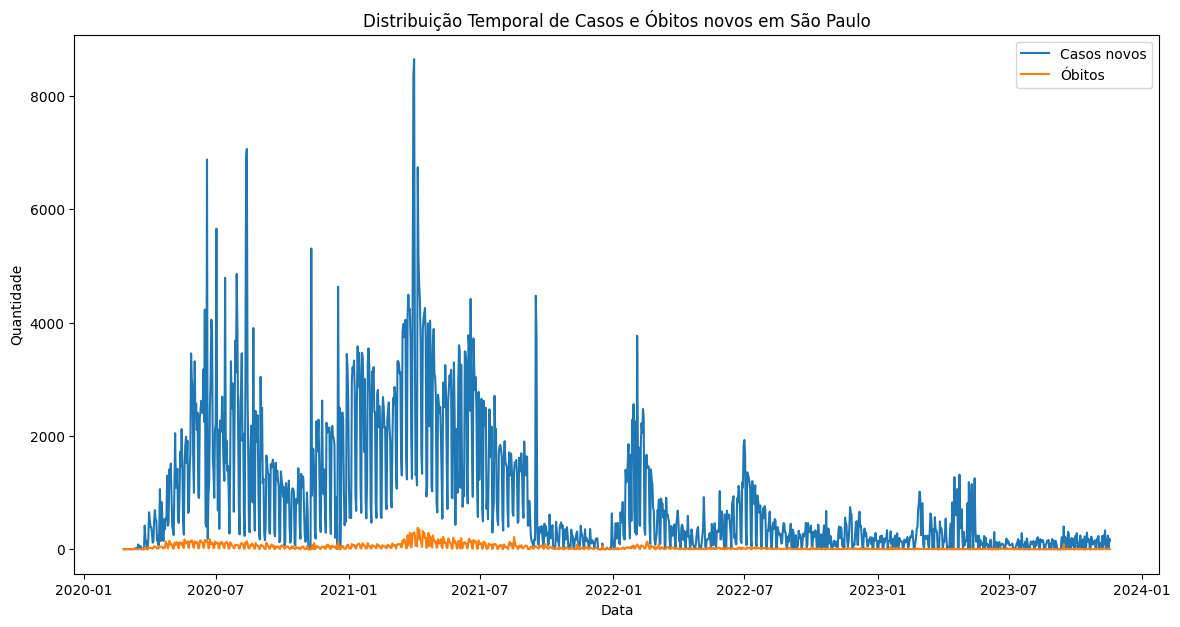

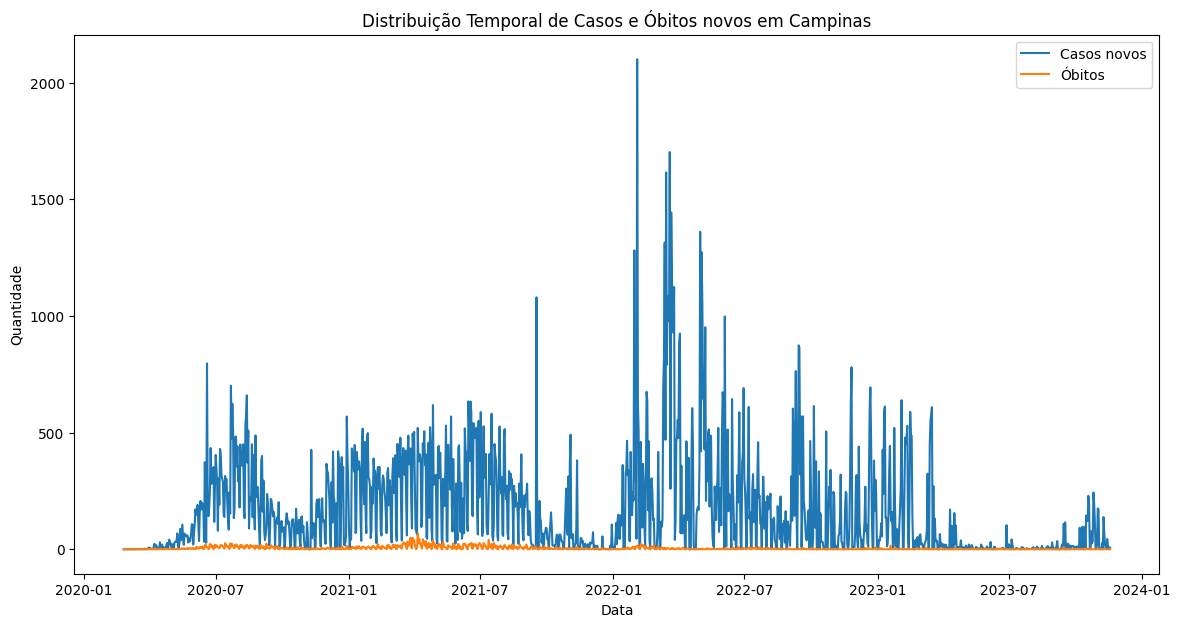

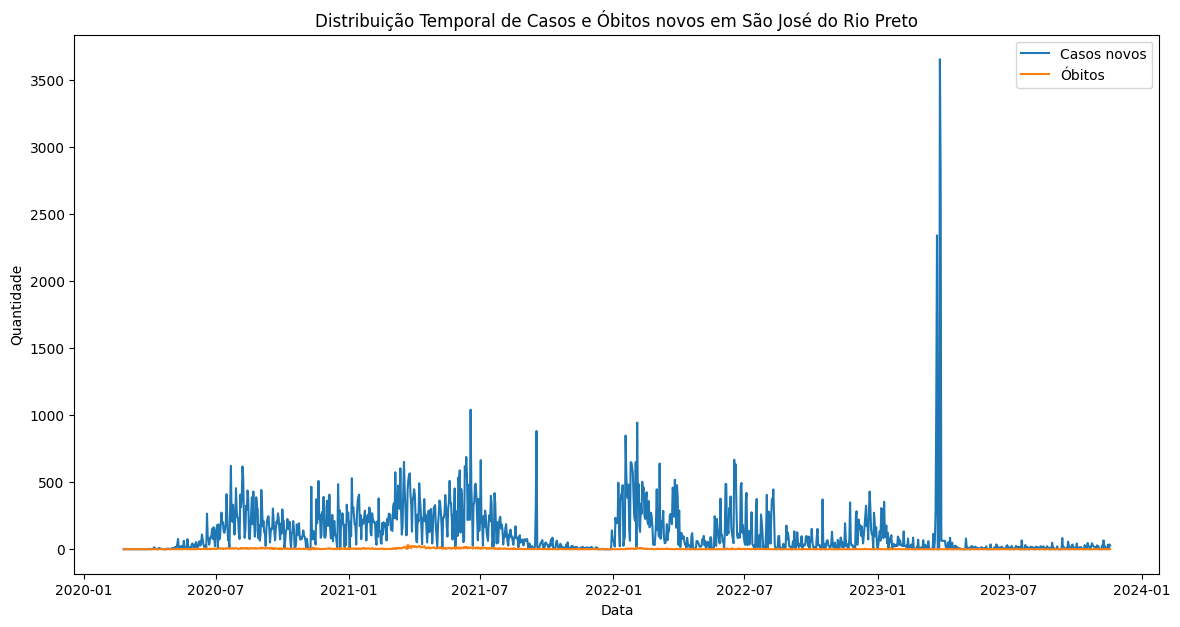

<Figure size 640x480 with 0 Axes>

In [ ]:
# Agregação diária

import matplotlib.pyplot as plt

# Determinar o número de subplots com base no número de dataframes
num_plots = len(lista_top_3_municipios)

# Criar uma figura com subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(14, 7 * num_plots))

# Se houver apenas um subplot, 'axes' não será uma lista, então converta para lista
if num_plots == 1:
    axes = [axes]

# Loop através dos dataframes e plotar em cada subparcela
for df in (lista_top_3_municipios):
  daily_data = df.groupby('datahora').sum(['casos_novos','obitos']).reset_index()
  nome_municipio = df.iloc[0].nome_munic
  # Plotar casos ao longo do tempo
  plt.figure(figsize=(14, 7))
  plt.plot(daily_data['datahora'], daily_data['casos_novos'], label='Casos novos')
  plt.plot(daily_data['datahora'], daily_data['obitos_novos'], label='Óbitos')
  plt.xlabel('Data')
  plt.ylabel('Quantidade')
  plt.title(f'Distribuição Temporal de Casos e Óbitos novos em {nome_municipio}')
  plt.legend()
  plt.show()
plt.tight_layout()

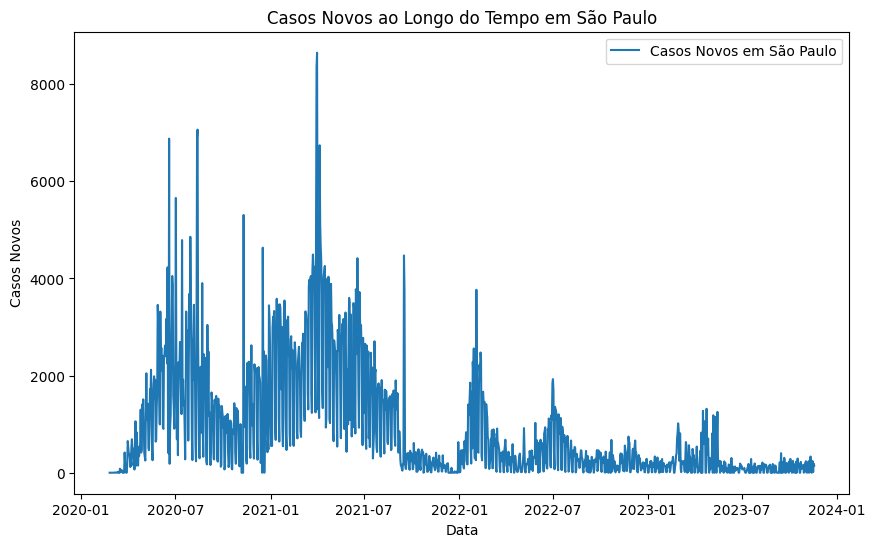

MSE: 77326.35065991814
MAE: 176.80960694111874
R2: -0.2779138690317917


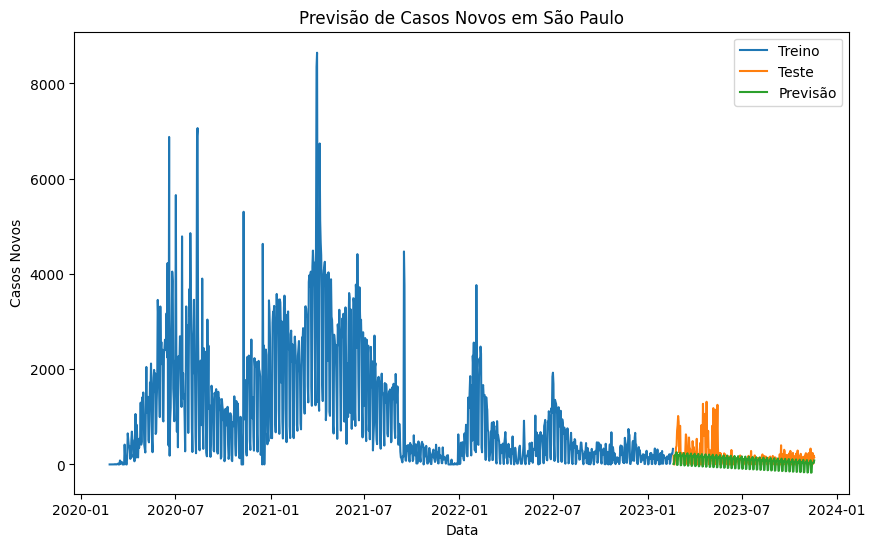

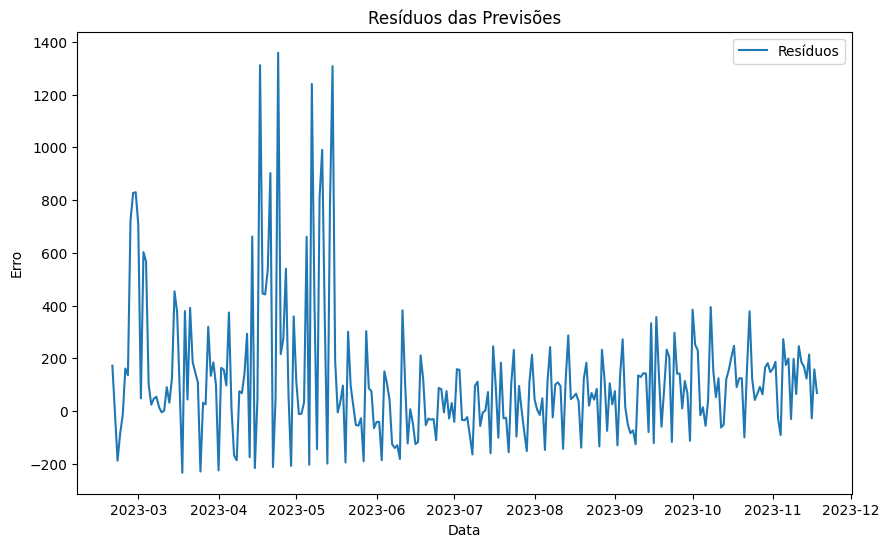

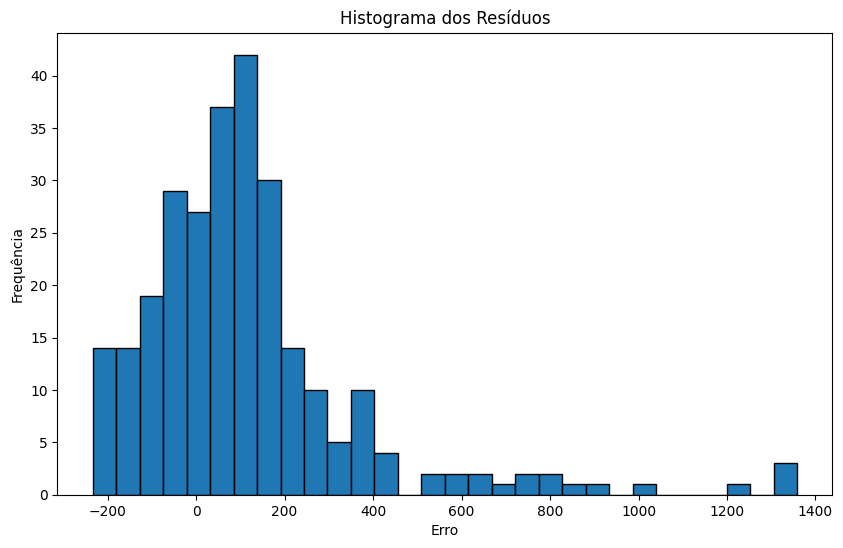

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Carregar os dados


# Convertendo a coluna de data para o tipo datetime
df['datahora'] = pd.to_datetime(df['datahora'], format='%Y-%m-%d')

# Definindo o índice como a coluna de data
df.set_index('datahora', inplace=True)

# Filtrando os dados para a cidade de São Paulo
cidade_especifica = df[df['nome_munic'] == 'São Paulo' &  df['datahora'] <='2022-01-01']

# Resumindo os casos novos por data
serie_temporal = cidade_especifica['casos_novos'].resample('D').sum()

# Visualizando a série temporal
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal, label='Casos Novos em São Paulo')
plt.title('Casos Novos ao Longo do Tempo em São Paulo')
plt.xlabel('Data')
plt.ylabel('Casos Novos')
plt.legend()
plt.show()

# Dividindo os dados em treino e teste (80% treino, 20% teste)
train_size = int(len(serie_temporal) * 0.8)
train, test = serie_temporal[:train_size], serie_temporal[train_size:]

# Ajustando o modelo SARIMA
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit(disp=False)

# Fazendo previsões
forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Avaliando o modelo
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

# Plotando as previsões vs. dados reais
plt.figure(figsize=(10, 6))
plt.plot(train, label='Treino')
plt.plot(test, label='Teste')
plt.plot(forecast, label='Previsão')
plt.title('Previsão de Casos Novos em São Paulo')
plt.xlabel('Data')
plt.ylabel('Casos Novos')
plt.legend()
plt.show()

# Plotando o erro residual
residuals = test - forecast
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Resíduos')
plt.title('Resíduos das Previsões')
plt.xlabel('Data')
plt.ylabel('Erro')
plt.legend()
plt.show()

# Plotando um histograma dos resíduos
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histograma dos Resíduos')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.show()
